In [1]:
import sys
sys.path.append('..')  # 添加上级目录到搜索路径
from utils import *

In [ ]:
filename = ["Blogs", "Metabolic", "Drosophila", "Music", "Airports", "Proteome",\
            "USpowergrid", "Gnutella", "Words", "DBLP", "Internet", "Enron"]


fig_labels = [r"\textbf{(a)}", r"\textbf{(b)}", r"\textbf{(c)}", r"\textbf{(d)}", r"\textbf{(e)}", \
              r"\textbf{(f)}", r"\textbf{(g)}", r"\textbf{(h)}", r"\textbf{(i)}", r"\textbf{(j)}", \
              r"\textbf{(k)}", r"\textbf{(l)}"]

In [3]:
kmin = 2

Blogs
Graph with 1222 nodes and 16714 edges
[0.0, 0.5, 0.75, 0.875]
Metabolic
Graph with 1436 nodes and 4718 edges
[0.0, 0.5, 0.75, 0.875]
Drosophila
Graph with 1770 nodes and 8905 edges
[0.0, 0.5, 0.75, 0.875]
Music
Graph with 2476 nodes and 20624 edges
[0.0, 0.5, 0.75, 0.875]
Airports
Graph with 3397 nodes and 19230 edges
[0.0, 0.5, 0.75, 0.875]
Proteome
Graph with 4100 nodes and 13358 edges
[0.0, 0.5, 0.75, 0.875]
USpowergrid
Graph with 4941 nodes and 6594 edges
[0.0, 0.5, 0.75, 0.875]
Gnutella
Graph with 6301 nodes and 20777 edges
[0.0, 0.5, 0.75, 0.875]
Words
Graph with 7377 nodes and 44205 edges
[0.0, 0.5, 0.75, 0.875]
DBLP
Graph with 12591 nodes and 49635 edges
[0.0, 0.5, 0.75, 0.875, 0.9375]
Internet
Graph with 23748 nodes and 58414 edges
[0.0, 0.5, 0.75, 0.875, 0.9375, 0.96875]
Enron
Graph with 33696 nodes and 180811 edges
[0.0, 0.5, 0.75, 0.875, 0.9375, 0.96875]


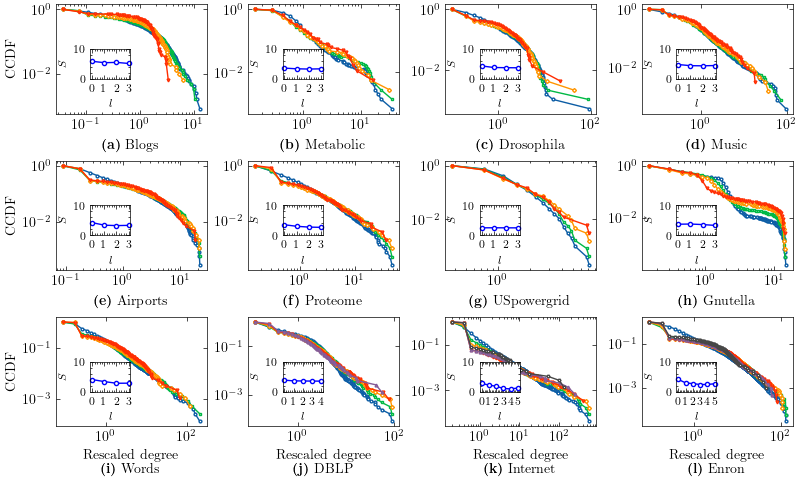

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(8, 4.8), constrained_layout=True)
for net_label in range(12):
    print(filename[net_label])
    G0 = load_graph_data(filename[net_label])
    N = len(G0)
    print(G0)

    # 设定移除节点比例
    if N < 10000:
        l = 4
    elif N >= 10000 and N < 20000:
        l = 5
    else:
        l = 6
    q = [1- 1./2**i for i in range(l)]
    print(q)

    DC_plus = cal_DC_plus(G0)
    sequence = dict(sorted(DC_plus.items(), key=lambda x: x[1], reverse=False))

    k0, Pk0 = get_ccdf(G0)
    S0 = get_pdf_entropy(G0)
    avk0 = 2*nx.number_of_edges(G0)/nx.number_of_nodes(G0)



    G = G0.copy()
    G1 = remove_nodes(G, sequence, N, q[1])
    G1 = get_LCC(G1)
    G1 = local_degree_sparsification(G1, avk0, kmin)
    k1, Pk1 = get_ccdf(G1)
    S1 = get_pdf_entropy(G1)

    G = G0.copy()
    G2 = remove_nodes(G, sequence, N, q[2])
    G2 = get_LCC(G2)
    G2 = local_degree_sparsification(G2, avk0, kmin)
    k2, Pk2 = get_ccdf(G2)
    S2 = get_pdf_entropy(G2)

    G = G0.copy()
    G3 = remove_nodes(G, sequence, N, q[3])
    G3 = get_LCC(G3)
    G3 = local_degree_sparsification(G3, avk0, kmin)
    k3, Pk3 = get_ccdf(G3)
    S3 = get_pdf_entropy(G3)

    pdf_entropy = [S0, S1, S2, S3]

    if l>4:
        G = G0.copy()
        G4 = remove_nodes(G, sequence, N, q[4])
        G4 = get_LCC(G4)
        G4 = local_degree_sparsification(G4, avk0, kmin)
        k4, Pk4 = get_ccdf(G4)
        S4 = get_pdf_entropy(G4)
        pdf_entropy.append(S4)

    if l>5:
        G = G0.copy()
        G5 = remove_nodes(G, sequence, N, q[5])
        G5 = get_LCC(G5)
        G5 = local_degree_sparsification(G5, avk0, kmin)
        k5, Pk5 = get_ccdf(G5)
        S5 = get_pdf_entropy(G5)
        pdf_entropy.append(S5)

    ax = axs[net_label//4, net_label%4]
    ax.plot(k0, Pk0, marker = 'o', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(0))
    ax.plot(k1, Pk1, marker = 's', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(1))
    ax.plot(k2, Pk2, marker = 'D', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(2))
    ax.plot(k3, Pk3, marker = 'v', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(3))
    if l>4:
        ax.plot(k4, Pk4, marker = '^', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(4))
    if l>5:
        ax.plot(k5, Pk5, marker = 'H', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$l=$ "+str(5))

    ax.set_xscale("log")
    ax.set_yscale("log")
    if net_label >=8:
        ax.set_xlabel("Rescaled degree")
        ax.set_title(fig_labels[net_label]+" "+filename[net_label], loc='center', y=-0.5, fontsize=10)
    else:
        ax.set_title(fig_labels[net_label]+" "+filename[net_label], loc='center', y=-0.4, fontsize=10)
    if net_label%4 == 0:
        ax.set_ylabel("CCDF")
    # if net_label == 0:
    #     ax.legend(loc=1, edgecolor = "black", handlelength=1.0, columnspacing=0.5, fontsize=8, frameon=True, fancybox=False)


    inset_ax = inset_axes(ax, width=0.4, height=0.3, loc=3, borderpad=2.5)
    inset_ax.plot(list(range(l)), pdf_entropy, color="blue", marker ="o", markersize = 3.0, markerfacecolor="w", clip_on=False)
    inset_ax.set_ylim([0, 10])
    inset_ax.set_xlabel('$l$', fontsize=8)
    inset_ax.set_ylabel('$S$', fontsize=8)
    inset_ax.set_xticks(list(range(l)))

    inset_ax.tick_params(axis='x', labelsize=8)
    inset_ax.tick_params(axis='y', labelsize=8)


plt.savefig("ccdf_pdf_entropy.pdf")
plt.show()